In [1]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("phyloseq")
# BiocManager::install("microbiome")
library(phyloseq)
library(ggplot2)
library(microbiome)


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




In [2]:
load("../02-diversity_analyses/.RData")
ps.dat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2918 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 2918 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2918 tips and 2917 internal nodes ]

[1] "mean number of ASVs per tooth: 106"

[1] "standard deviation: 54"

[1] "maximum number of ASVs: 338"

[1] "mininum number of ASVs: 9"

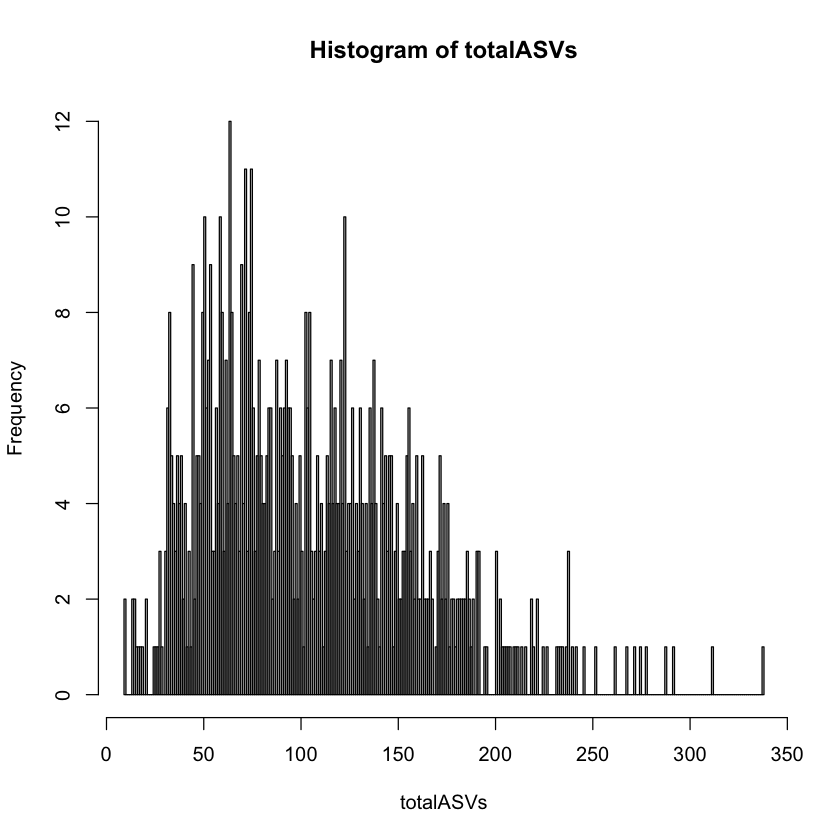

In [3]:
system("mkdir img")
# first get the total number of ASVs found across tooth samples
temp <- as.data.frame(otu_table(ps.dat))
temp[temp>0] <- 1
totalASVs <- rowSums(temp)
paste("mean number of ASVs per tooth:", round(mean(totalASVs), digits=0))
paste("standard deviation:", round(sd(totalASVs), digits=0))
paste("maximum number of ASVs:", max(totalASVs))
paste("mininum number of ASVs:", min(totalASVs))
hist(totalASVs, breaks=350)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


pdf 
  2

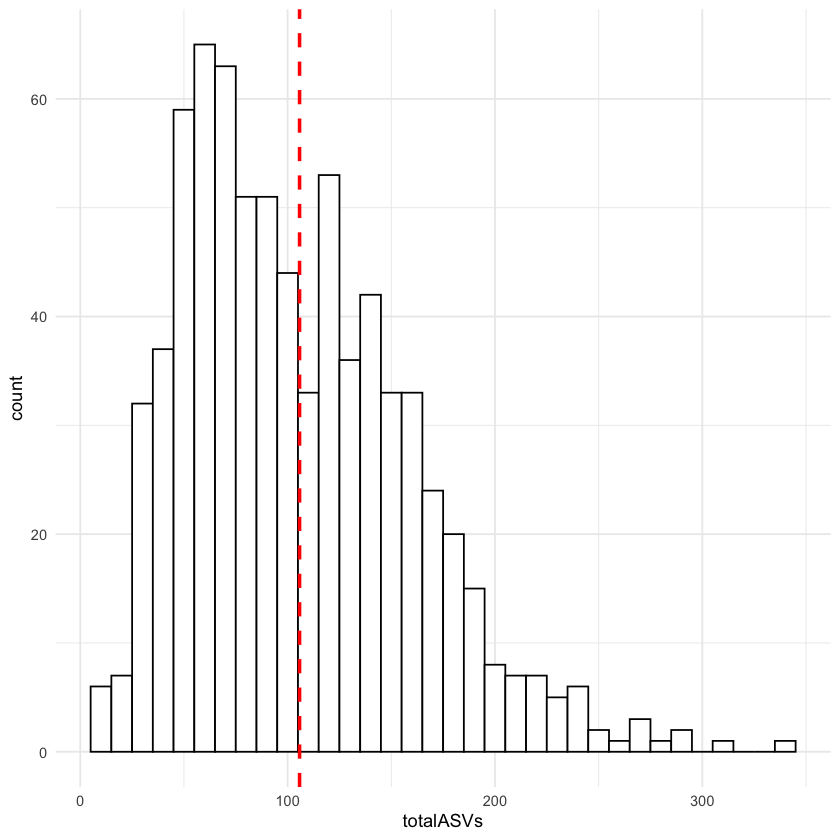

In [4]:
system("mkdir img")
# cleaned up histogram
pdf("img/totalASVs_hist.pdf")
ggplot(as.data.frame(totalASVs), aes(x=totalASVs)) + geom_histogram(color="black", fill="white", binwidth = 10) + geom_vline(aes(xintercept=mean(totalASVs)), color="red", linetype="dashed", size=1) + theme_minimal()
dev.off()
ggplot(as.data.frame(totalASVs), aes(x=totalASVs)) + geom_histogram(color="black", fill="white", binwidth = 10) + geom_vline(aes(xintercept=mean(totalASVs)), color="red", linetype="dashed", size=1) + theme_minimal()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 13 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 13 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 13 tips and 12 internal nodes ]

[1] "mean number of ASVs per tooth: 1"

[1] "standard deviation: 1"

[1] "maximum number of ASVs: 8"

[1] "mininum number of ASVs: 0"

pdf 
  2

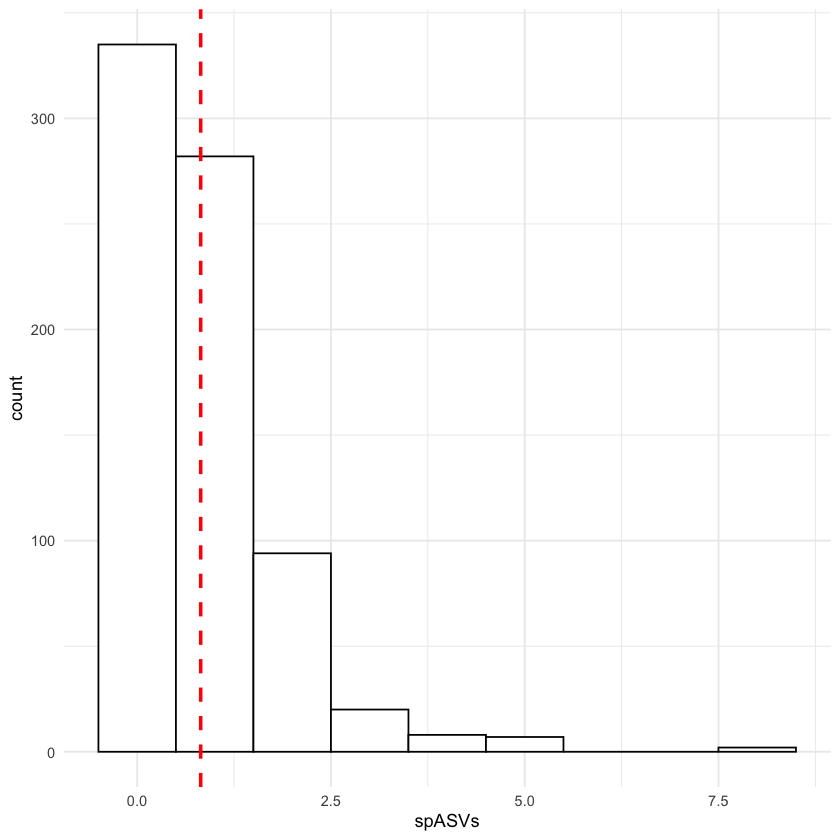

In [5]:
# number of ASVs in a single tooth within a single species
sp.dat <- subset_taxa(ps.dat, V9 == "Lachnospiraceae_bacterium_oral_taxon_096")
sp.dat
sp.df <- as.data.frame(otu_table(sp.dat))
sp.df[sp.df>0] <- 1
spASVs <- rowSums(sp.df)
paste("mean number of ASVs per tooth:", round(mean(spASVs), digits=0))
paste("standard deviation:", round(sd(spASVs), digits=0))
paste("maximum number of ASVs:", max(spASVs))
paste("mininum number of ASVs:", min(spASVs))
pdf("img/spASVs_hist.pdf")
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()
dev.off()
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”


pdf 
  2

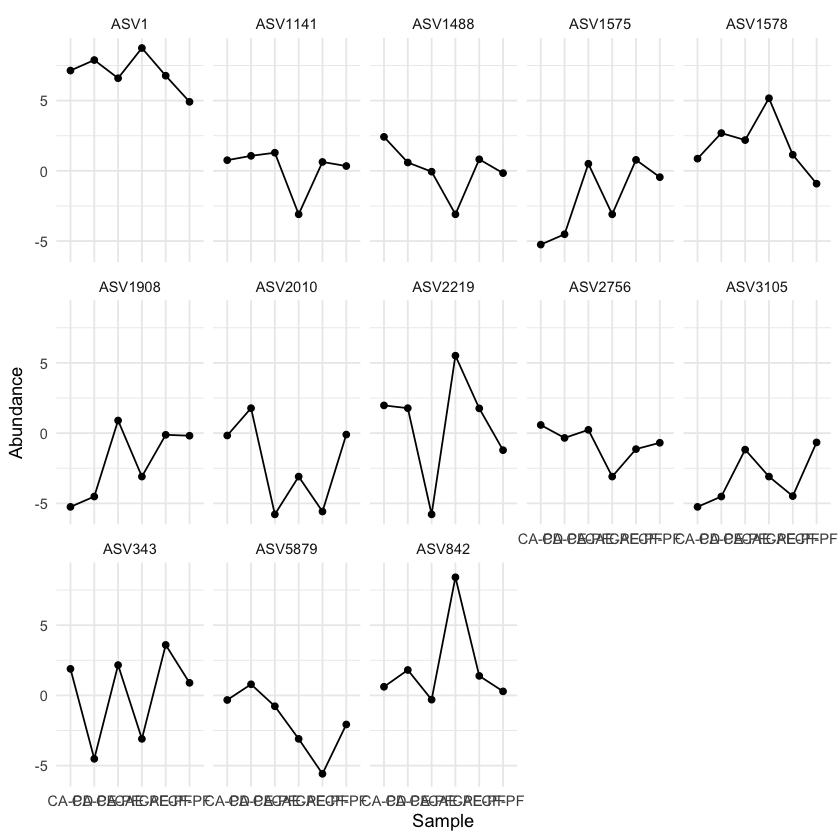

In [6]:
merged <- merge_samples(sp.dat, "aliquot_type")
merged <- prune_taxa(taxa_sums(merged) > 0, merged)
merged <- transform(merged, "clr")
datmelt <- psmelt(merged)
pdf("img/spASV_linegraph.pdf")
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()
dev.off()
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()

In [7]:
# range of clr abundances?
datmelt$Abundance

[1]  8.74289439  8.40972599  7.88718529  7.13887586  6.77155858  6.59328539
 [7]  5.51414769  5.16995327  4.91350298  3.59487400  2.68819081  2.41833489
[13]  2.19013478  2.16034168  1.97310842  1.89003783  1.80968313  1.77640757
[19]  1.77640757  1.76262916  1.39058005  1.28972656  1.14488361  1.06808449
[25]  0.89961458  0.89605924  0.86739093  0.82176717  0.79302977  0.78115245
[31]  0.75844623  0.63245607  0.61424771  0.59346134  0.58044417  0.50508866
[37]  0.34346447  0.28775039  0.23401035 -0.05863765 -0.10311952 -0.12056451
[43] -0.16140416 -0.16859858 -0.18460441 -0.30242432 -0.32575714 -0.34152386
[49] -0.45015532 -0.66028814 -0.68633912 -0.77189888 -0.91414733 -1.13749877
[55] -1.17403642 -1.21244023 -2.06827885 -3.09296904 -3.09296904 -3.09296904
[61] -3.09296904 -3.09296904 -3.09296904 -3.09296904 -3.09296904 -3.09296904
[67] -4.48153774 -4.51273153 -4.51273153 -4.51273153 -4.51273153 -5.24884344
[73] -5.24884344 -5.24884344 -5.58015003 -5.58015003 -5.78260237 -5.78260237

In [8]:
# relative abundance of same ASVs (log transformed)
relabund <- transform_sample_counts(ps.dat, function(x) x / sum(x))
relabund

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2918 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 2918 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2918 tips and 2917 internal nodes ]

Warning message:
“Removed 408 rows containing non-finite values (`stat_boxplot()`).”


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV1,CF-PF,CAE-PF,0.01254800,0.16,0.013,*,Wilcoxon
ASV1,CF-PF,CA-PF,0.35290711,0.57,0.353,ns,Wilcoxon
ASV1,CF-PF,CAE-PE,0.90573905,0.91,0.906,ns,Wilcoxon
ASV1,CF-PF,CA-PE,0.18663943,0.53,0.187,ns,Wilcoxon
ASV1,CF-PF,CA-PD,0.02141362,0.16,0.021,*,Wilcoxon
ASV1,CAE-PF,CA-PF,0.11602379,0.52,0.116,ns,Wilcoxon
ASV1,CAE-PF,CAE-PE,0.13778982,0.52,0.138,ns,Wilcoxon
ASV1,CAE-PF,CA-PE,0.21685111,0.53,0.217,ns,Wilcoxon
ASV1,CAE-PF,CA-PD,0.27361701,0.53,0.274,ns,Wilcoxon


Warning message:
“Removed 733 rows containing non-finite values (`stat_boxplot()`).”


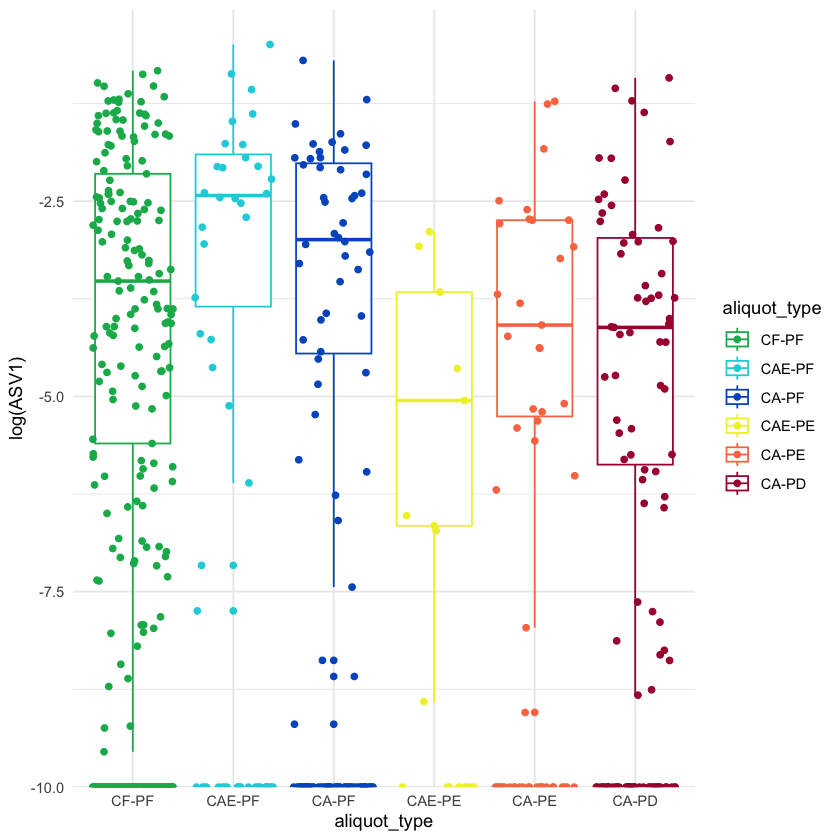

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV1575,CF-PF,CAE-PF,0.0007454311,0.0089,0.00075,***,Wilcoxon
ASV1575,CF-PF,CA-PF,0.4730766206,0.5300,0.47308,ns,Wilcoxon
ASV1575,CF-PF,CAE-PE,0.5824699293,0.5800,0.58247,ns,Wilcoxon
ASV1575,CF-PF,CA-PE,0.3524995338,0.4700,0.35250,ns,Wilcoxon
ASV1575,CF-PF,CA-PD,0.1882151681,0.3200,0.18822,ns,Wilcoxon
ASV1575,CAE-PF,CA-PF,0.0688629845,0.2100,0.06886,ns,Wilcoxon
ASV1575,CAE-PF,CAE-PE,0.1804974992,0.3200,0.18050,ns,Wilcoxon
ASV1575,CAE-PF,CA-PE,0.0244836743,0.0980,0.02448,*,Wilcoxon
ASV1575,CAE-PF,CA-PD,0.0015417547,0.0093,0.00154,**,Wilcoxon


Warning message:
“Removed 720 rows containing non-finite values (`stat_boxplot()`).”


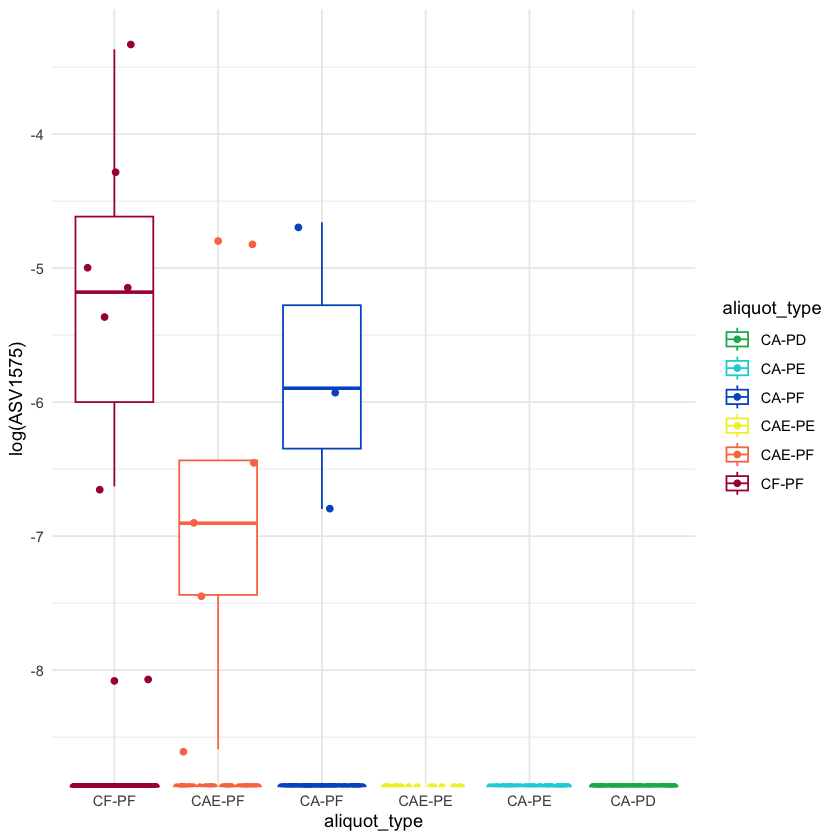

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV1578,CF-PF,CAE-PF,0.52637611,0.88,0.526,ns,Wilcoxon
ASV1578,CF-PF,CA-PF,0.03499434,0.26,0.035,*,Wilcoxon
ASV1578,CF-PF,CAE-PE,0.39953507,0.88,0.400,ns,Wilcoxon
ASV1578,CF-PF,CA-PE,0.03469341,0.26,0.035,*,Wilcoxon
ASV1578,CF-PF,CA-PD,0.41303459,0.88,0.413,ns,Wilcoxon
ASV1578,CAE-PF,CA-PF,0.52799210,0.88,0.528,ns,Wilcoxon
ASV1578,CAE-PF,CAE-PE,0.77397337,0.93,0.774,ns,Wilcoxon
ASV1578,CAE-PF,CA-PE,0.42120712,0.88,0.421,ns,Wilcoxon
ASV1578,CAE-PF,CA-PD,0.99545364,1.00,0.995,ns,Wilcoxon


Warning message:
“Removed 727 rows containing non-finite values (`stat_boxplot()`).”


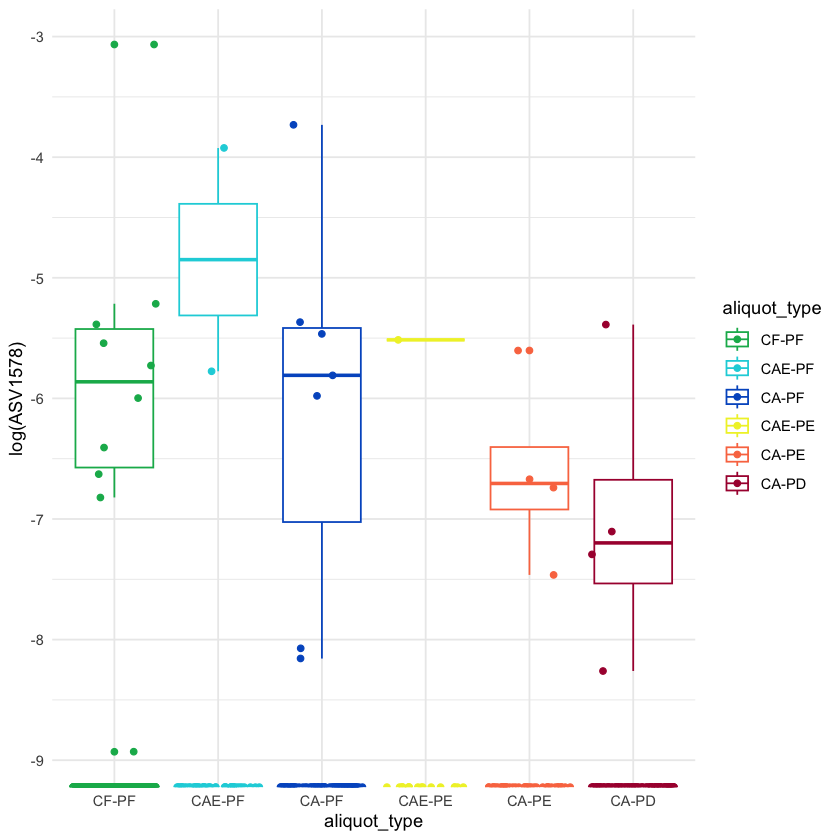

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV2219,CF-PF,CAE-PF,0.0002832073,0.0024,0.00028,***,Wilcoxon
ASV2219,CF-PF,CA-PF,0.1221433996,0.2600,0.12214,ns,Wilcoxon
ASV2219,CF-PF,CAE-PE,0.3333058495,0.5000,0.33331,ns,Wilcoxon
ASV2219,CF-PF,CA-PE,0.9318688999,0.9300,0.93187,ns,Wilcoxon
ASV2219,CF-PF,CA-PD,0.3114901721,0.5000,0.31149,ns,Wilcoxon
ASV2219,CAE-PF,CA-PF,0.0003221663,0.0024,0.00032,***,Wilcoxon
ASV2219,CAE-PF,CAE-PE,0.4939744855,0.6100,0.49397,ns,Wilcoxon
ASV2219,CAE-PF,CA-PE,0.0558139662,0.1700,0.05581,ns,Wilcoxon
ASV2219,CAE-PF,CA-PD,0.0700915530,0.1800,0.07009,ns,Wilcoxon


Warning message:
“Removed 408 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 733 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 720 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 727 rows containing non-finite values (`stat_boxplot()`).”


pdf 
  2

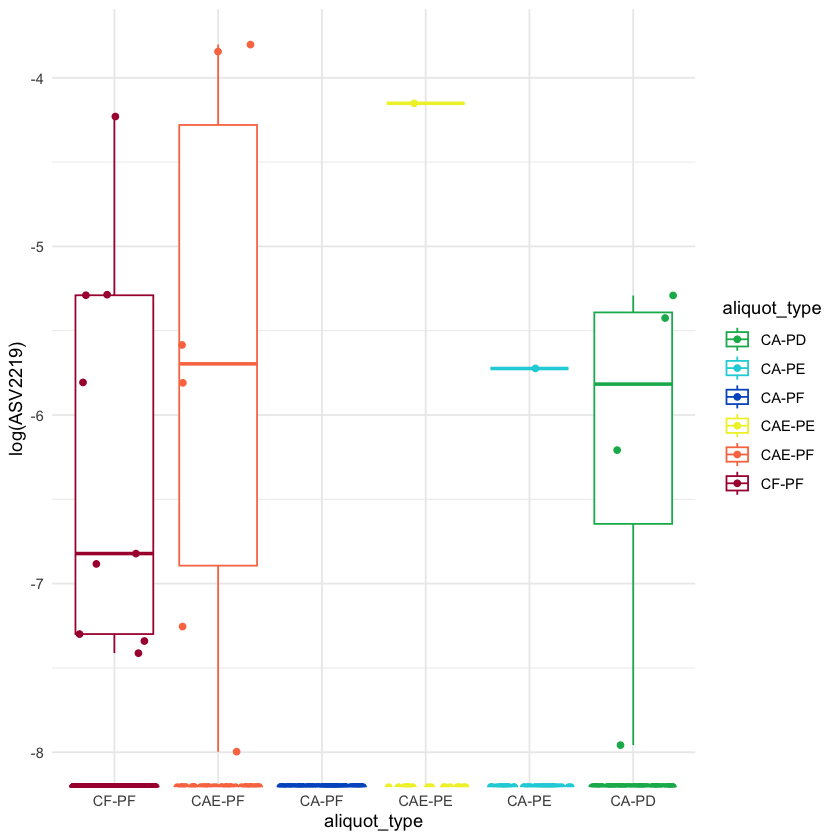

In [115]:
# number of ASVs in a single tooth within a single species
temp <- as.data.frame(otu_table(relabund))
temp$aliquot_type <- sample_data(relabund)$aliquot_type
temp$aliquot_type <- factor(temp$aliquot_type, levels=c("CF-PF", "CAE-PF", "CA-PF", "CAE-PE", "CA-PE", "CA-PD"))
# plot individual boxplots -- only including those that are significant in final figure
ggplot(temp, aes(x=aliquot_type, y=log(ASV1), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV1 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

ggplot(temp, aes(x=aliquot_type, y=log(ASV1575), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV1575 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

ggplot(temp, aes(x=aliquot_type, y=log(ASV1578), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV1578 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

ggplot(temp, aes(x=aliquot_type, y=log(ASV2219), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV2219 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

pdf("asv_abundance_suppFig2C.pdf")
ggplot(temp, aes(x=aliquot_type, y=log(ASV1), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
ggplot(temp, aes(x=aliquot_type, y=log(ASV1575), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
ggplot(temp, aes(x=aliquot_type, y=log(ASV1578), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
ggplot(temp, aes(x=aliquot_type, y=log(ASV2219), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
dev.off()

# # install.packages("ggpubr")
# library(ggpubr)
# pdf("asv_abundance_suppFig2C.pdf")
# ggarrange(asv1, asv1141, asv1488, asv1575, asv1578, asv1908, asv2010, asv2219, asv2756, asv3105, asv343, asv5879, asv842, ncol=7, nrow=3)
# dev.off()
# # not sure why colors get flipped in subsequent figures... will fix in inkscape, put on todolist
# ggarrange(asv1, asv1141, asv1488, asv1575, asv1578, asv1908, asv2010, asv2219, asv2756, asv3105, asv343, asv5879, asv842, ncol=7, nrow=3)


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 5 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5 tips and 4 internal nodes ]

[1] "mean number of ASVs per tooth: 0"

[1] "standard deviation: 1"

[1] "maximum number of ASVs: 5"

[1] "mininum number of ASVs: 0"

pdf 
  2

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”


pdf 
  2

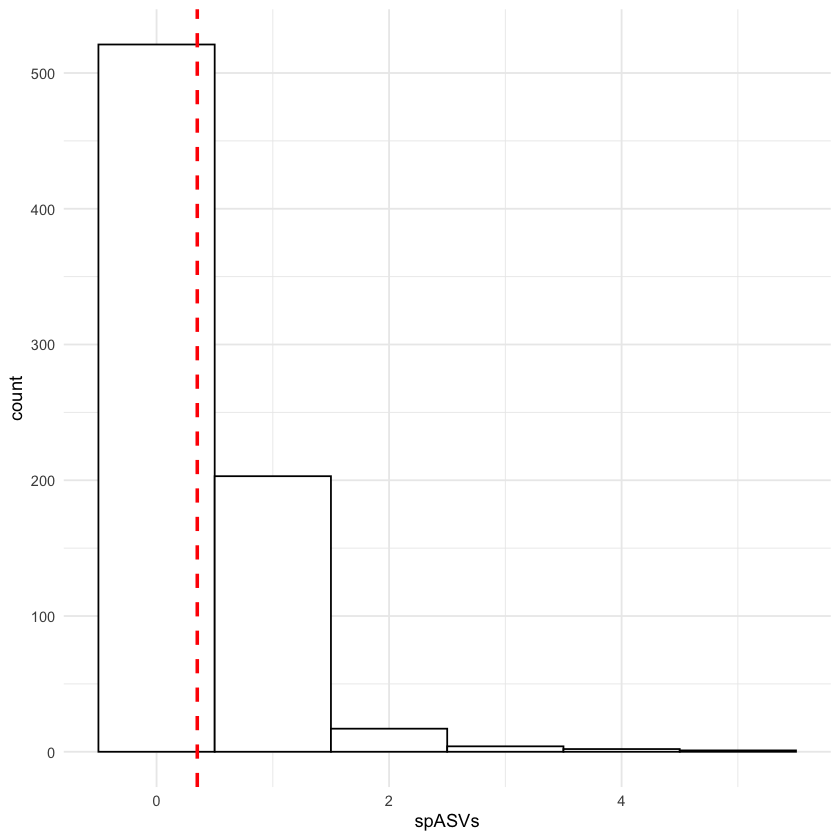

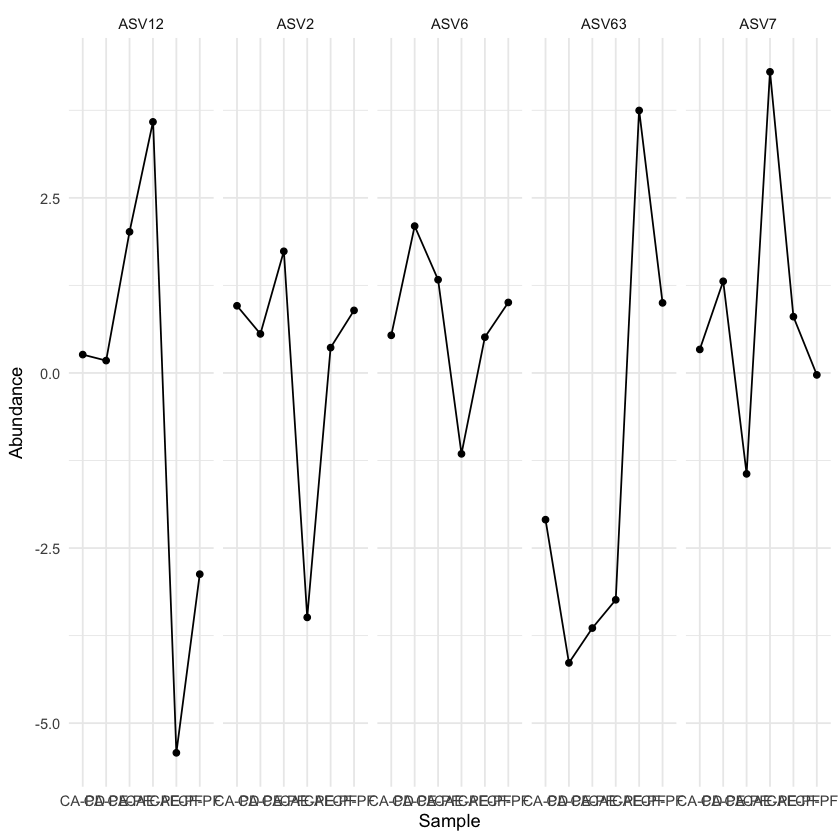

In [10]:
# number of ASVs in a single tooth within a single species
sp.dat <- subset_taxa(ps.dat, V9 == "Streptococcus_mutans")
sp.dat
sp.df <- as.data.frame(otu_table(sp.dat))
sp.df[sp.df>0] <- 1
spASVs <- rowSums(sp.df)
paste("mean number of ASVs per tooth:", round(mean(spASVs), digits=0))
paste("standard deviation:", round(sd(spASVs), digits=0))
paste("maximum number of ASVs:", max(spASVs))
paste("mininum number of ASVs:", min(spASVs))
pdf("img/Smutans_spASVs_hist.pdf")
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()
dev.off()
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()

merged <- merge_samples(sp.dat, "aliquot_type")
merged <- prune_taxa(taxa_sums(merged) > 0, merged)
merged <- transform(merged, "clr")
datmelt <- psmelt(merged)
pdf("img/Smutans_spASV_linegraph.pdf")
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()
dev.off()
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()

Warning message:
“Removed 710 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 671 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 679 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 726 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 692 rows containing non-finite values (`stat_boxplot()`).”


pdf 
  2

Warning message:
“Removed 710 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 671 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 679 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 726 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 692 rows containing non-finite values (`stat_boxplot()`).”


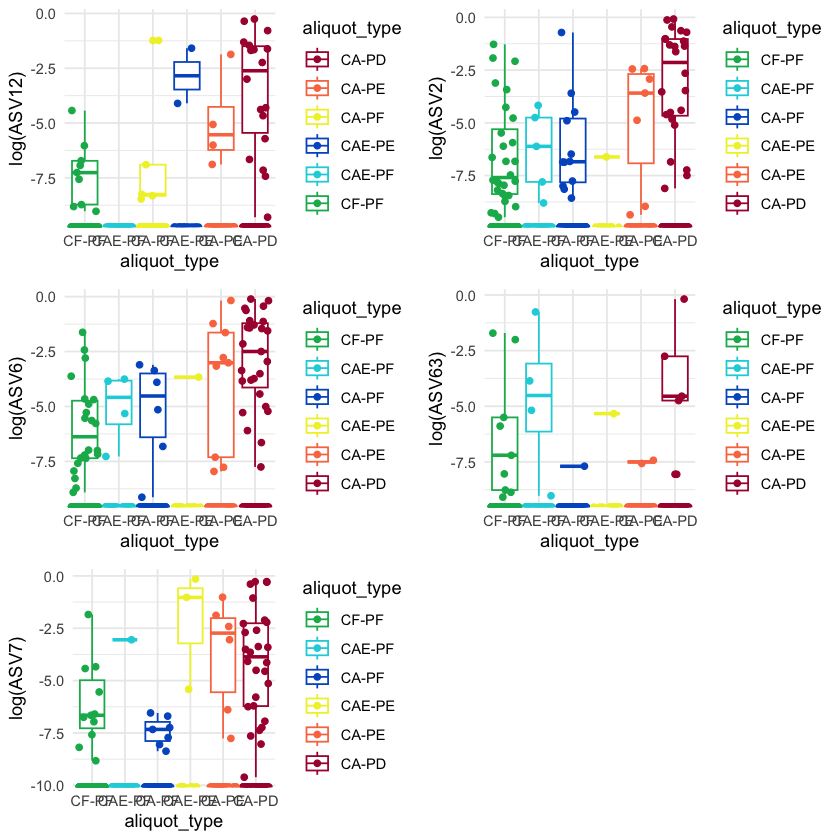

In [21]:
# relative abundance of Strep mutans ASVs for supplement
# number of ASVs in a single tooth within a single species
temp <- as.data.frame(otu_table(relabund))
temp$aliquot_type <- sample_data(relabund)$aliquot_type
temp$aliquot_type <- factor(temp$aliquot_type, levels=c("CF-PF", "CAE-PF", "CA-PF", "CAE-PE", "CA-PE", "CA-PD"))
# plot individual boxplots
asv12 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV12), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#AA0A3C", "#FA7850", "#F0F032", "#005AC8", "#14D2DC", "#0AB45A"))
asv2 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV2), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
asv6 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV6), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
asv63 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV63), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
asv7 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV7), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
pdf("asv_abundance_suppFigStrep.pdf")
ggarrange(asv12, asv2, asv6, asv63, asv7, ncol=2, nrow=3)
dev.off()
ggarrange(asv12, asv2, asv6, asv63, asv7, ncol=2, nrow=3)

In [12]:
sub.ps.dat <- subset_samples(ps.dat, aliquot_type == "CA-PD")
write.table(tax_table(sub.ps.dat), "tax_capd.txt", sep="\t")
# delete to V4, clean up and copy s. mutans to V4

In [13]:
tax <- read.table("tax_capd_fixed.txt", header=T, row.names = 1)
tax_table(sub.ps.dat) <- as.matrix(tax)

glom <- tax_glom(sub.ps.dat, taxrank="V4") 
glom <- transform_sample_counts(glom, function(x)x/sum(x))
data <- psmelt(glom)
data$V4 <- as.character(data$V4)
write.table(data, "strep_abund.txt", sep="\t")
# sort table by abundance, add AAA to strep mutans so it 

pdf 
  2

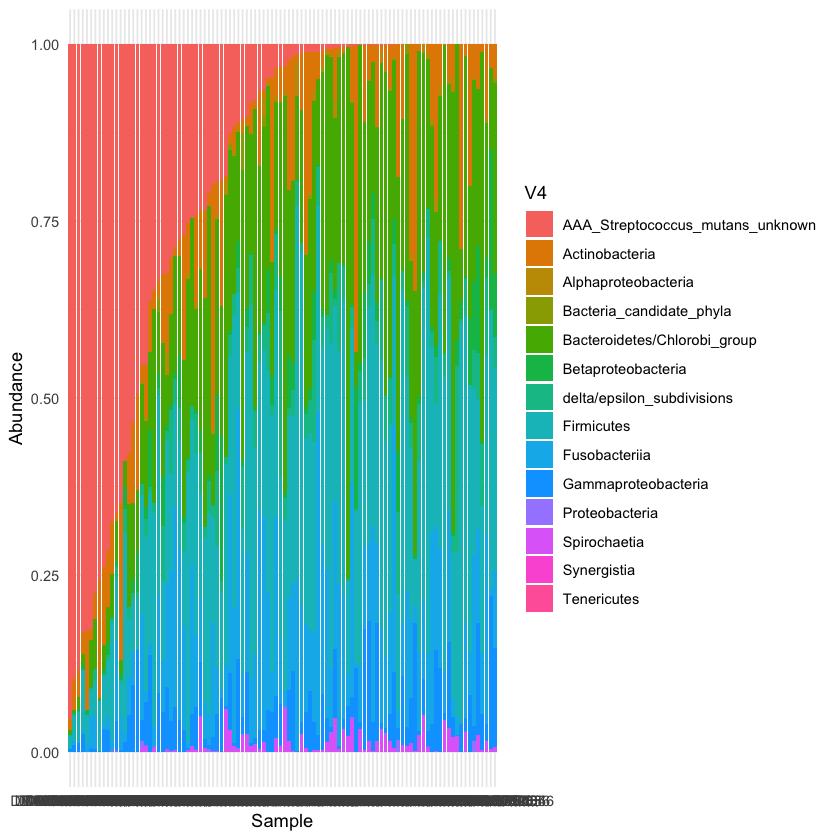

In [14]:
data <- read.table("strep_abund_sort.txt", sep="\t", header=T)
# data$V3[data$Abundance < 0.05] <- "< 5% abund"
data$Sample <- factor(data$Sample, levels = unique(data$Sample))

pdf("img/capd_strep_taxbar.pdf")
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal()
dev.off()
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal()

In [15]:
# do the same thing with CAE-PE and CA-PE
sub.ps.dat <- subset_samples(ps.dat, aliquot_type == "CA-PE" | aliquot_type == "CAE-PE")
write.table(tax_table(sub.ps.dat), "tax_pe.txt", sep="\t")

In [16]:
tax <- read.table("tax_pe_fixed.txt", header=T, row.names = 1)
tax_table(sub.ps.dat) <- as.matrix(tax)

glom <- tax_glom(sub.ps.dat, taxrank="V4") 
glom <- transform_sample_counts(glom, function(x)x/sum(x))
data <- psmelt(glom)
data$V4 <- as.character(data$V4)
write.table(data, "strep_abund_pe.txt", sep="\t")
# sort table by abundance, add AAA to strep mutans so it 

pdf 
  2

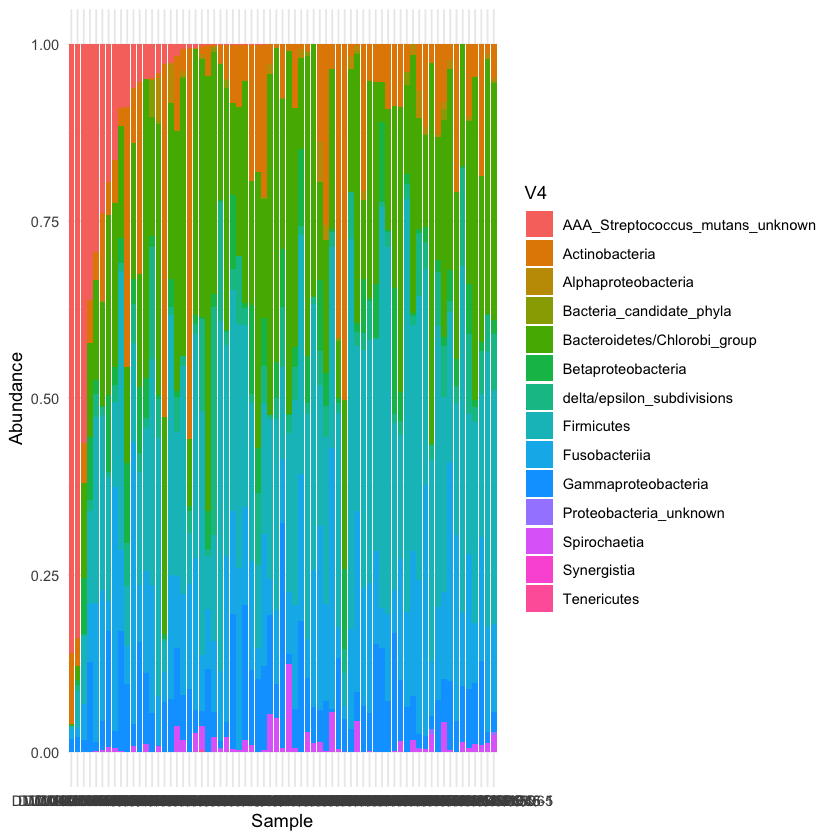

In [17]:
data <- read.table("strep_abund_pe_sort.txt", sep="\t", header=T)
# data$V3[data$Abundance < 0.05] <- "< 5% abund"
data$Sample <- factor(data$Sample, levels = unique(data$Sample))

pdf("img/pe_strep_taxbar.pdf")
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal()
dev.off()
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal()

pdf 
  2

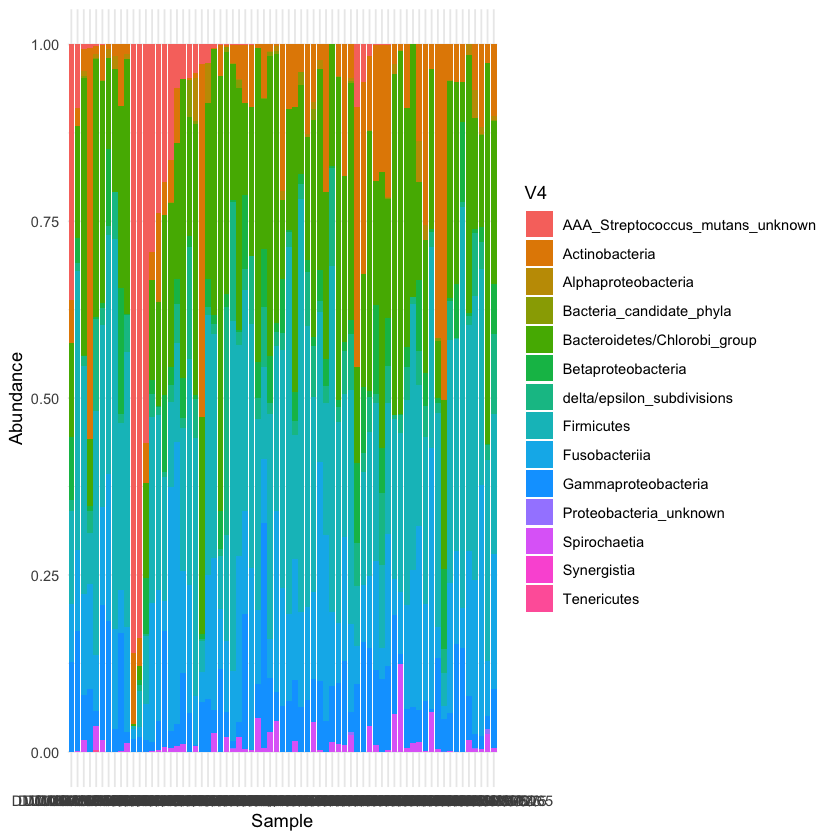

In [18]:
# sorted by HIV status
data <- read.table("strep_abund_pe_sort_HIstatus.txt", sep="\t", header=T)
# data$V3[data$Abundance < 0.05] <- "< 5% abund"
data$Sample <- factor(data$Sample, levels = unique(data$Sample))

pdf("img/pe_strep_taxbar_HIstatus.pdf")
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal()
dev.off()
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal()

In [19]:
# what about with CF-PF??
sub.ps.dat <- subset_samples(ps.dat, aliquot_type == "CF-PF")
write.table(tax_table(sub.ps.dat), "tax_pf.txt", sep="\t")